# It's the one that we choose to go deeper

Members: 
- Manuela 
- Lucresse
- Likhita
- Gil-Allen
- Regis
- Lionel

# FRAUD PREDICTION
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

It contains only numerical input variables which are the result of a PCA transformation.

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.( 1 = fraud; 0 != fraud)

In [1]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Other Libraries

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,  RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, average_precision_score,precision_recall_curve, confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

## Data preparation

### Read the dataset

In [2]:
# Load data
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().sum() #NO missing values

0

In [7]:
df.duplicated().sum() #There is duplicate value, we need to drop it

1081

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
# Class repartition
distribution = df['Class'].value_counts().reset_index()
distribution.columns = ['class', 'Number']

fig = px.bar(distribution, x='class', y='Number', title='Class repartition')
fig.show()


In [11]:

# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


There is a class imbalance, where one class of the target variable is significantly more frequent than the other.

This class imbalance can pose challenges in some machine learning tasks, as models can tend to be biased towards the majority class ("0"), which can lead to poor performance for the other class("1").

### Separate features from label


In [12]:
# Get the features and label in two variables.
X = df.drop(columns=['Class'])
y = df['Class']

### Train / test split

In [13]:
original_X_train, original_X_test,original_y_train,original_y_test=train_test_split(X,y,test_size=0.20)

In [14]:
# Check that X and y of each set have the same number of samples
print(original_X_train.shape)
print(original_X_test.shape)
print(original_y_train.shape)
print(original_y_test.shape)


(226980, 30)
(56746, 30)
(226980,)
(56746,)


## Model prediction

In [15]:
#AdaBoost Model
model = AdaBoostClassifier(n_estimators=10, random_state=0)
model.fit(original_X_train, original_y_train)
print("AdaBoost_score_precision: ",round(model.score(original_X_train,original_y_train)*100,2),"%")

AdaBoost_score_precision:  99.92 %


## Model Evaluation

Given the class imbalance ratio, Confusion matrix, Accuracy, AUC-ROC is not meaningful for unbalanced classification.

We will use precision,recall,f1-score,Precision-Recall AUC to evaluate the model performance.


In [16]:
y_pred = model.predict(original_X_test)

In [17]:
y_pred_proba= model.predict_proba(original_X_test)[:,1]


#### Global Metrics

In [18]:
# Classification Report
class_report = classification_report(original_y_test, y_pred,output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

class_report_df = pd.DataFrame(class_report).transpose()
class_report_df[['precision', 'recall', 'f1-score']] = class_report_df[['precision', 'recall', 'f1-score']].round(2)
class_report_df['support']= class_report_df['support'].astype(int)

In [19]:
# Classification Report Viz


fig = go.Figure(data=[go.Table(
    header=dict(values=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'],
                fill_color='lightblue',
                font=dict(color='black', size=15)),
    cells=dict(values=[class_report_df.index,
                       class_report_df['precision'],
                       class_report_df['recall'],
                       class_report_df['f1-score'],
                       class_report_df['support']],
                       font=dict(color='black', size=15))

)], layout=dict(title='Classification Report',
                title_x=0.5,
                title_font_size=50,
                title_font= dict(color='black'),
                height=250,
                width=1000,
                margin=dict(l=50,r=50,b=50,t=50,pad=4)))

# Show the figure
fig.show()

The F1-score of 0.66 for Class 1 suggests that there's room for improvement in balancing precision and recall for detecting fraudulent transactions.

#### Threshold selection


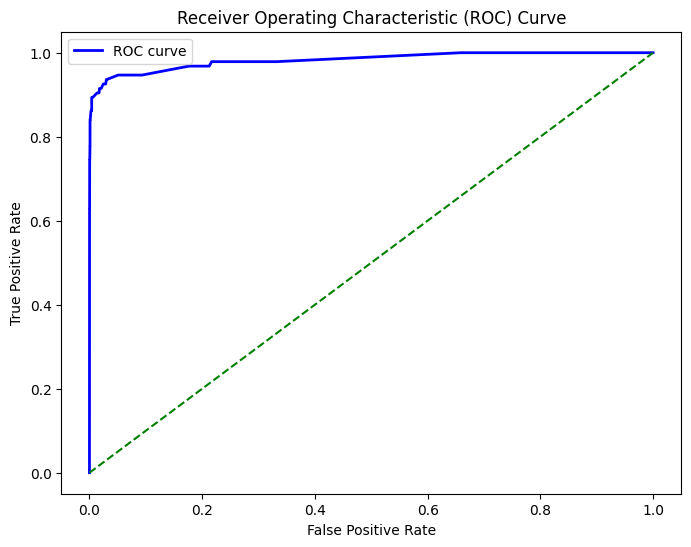

In [20]:

# ROC_Curve

fpr, tpr, _ = roc_curve(original_y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [21]:
# Precision-Recall AUC score

auc_pr = average_precision_score(original_y_test, y_pred_proba)
print(f'AUC-PR Score: {round(auc_pr, 3)}')


AUC-PR Score: 0.737


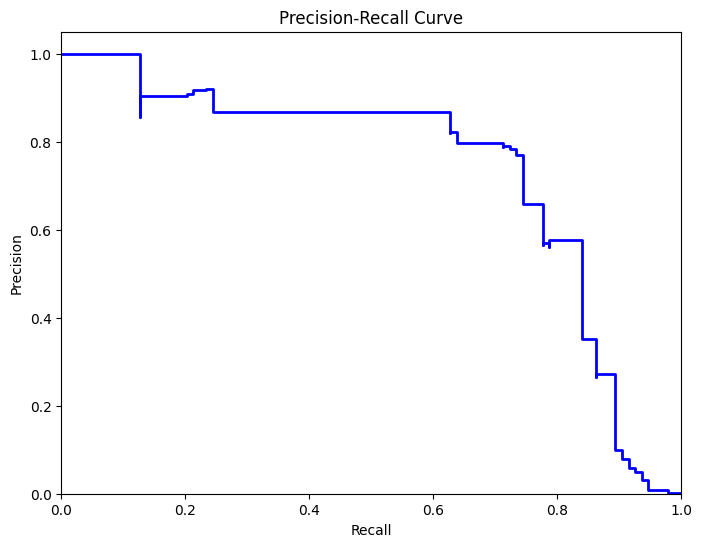

In [22]:
# Precision-Recall curve


precision, recall, _ = precision_recall_curve(original_y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


In summary, while precision and recall are essential metrics for evaluating model performance, especially in imbalanced datasets, they should be interpreted in conjunction with other metrics such as F1-score, area under the ROC curve (AUC-ROC), or area under the precision-recall curve (AUC-PR). Additionally, using techniques like resampling (e.g., oversampling, undersampling), adjusting class weights, or employing advanced algorithms specifically designed for imbalanced datasets (e.g., SMOTE, ADASYN) can help address issues related to imbalanced classes and provide a more robust evaluation of model performance

we will now use resampling method to deal with imbalanced dataset.

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.
Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [23]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182898,125579.0,1.958426,-0.719849,-1.704841,-0.612355,1.712376,3.913679,-1.250667,1.054519,1.314240,...,0.192702,0.690983,0.157264,0.726699,-0.060672,-0.192507,0.060628,-0.042583,11.50,0
178208,123525.0,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,...,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,45.51,1
116139,74159.0,-1.548788,1.808698,-0.953509,2.213085,-2.015728,-0.913457,-2.356013,1.197169,-1.678374,...,0.855138,0.774745,0.059037,0.343200,-0.468938,-0.278338,0.625922,0.395573,76.94,1
9252,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1


Equally Distributing and Correlating:
Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.



Distribution of the Classes in the subsample dataset
Class
0    0.509845
1    0.490155
Name: count, dtype: float64


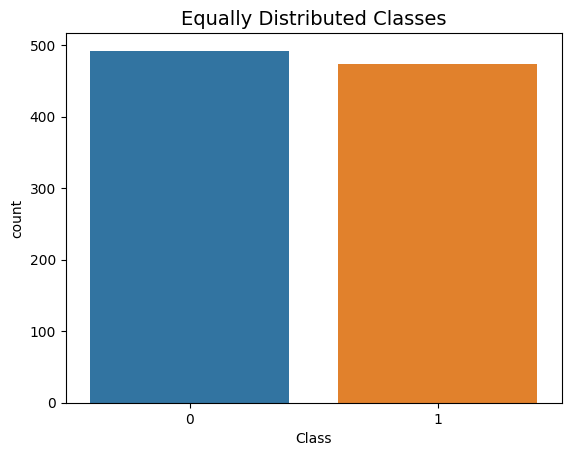

In [24]:

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


colors = ["#1f77b4", "#ff7f0e"]
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [25]:
# Our data is already scaled we should split our training and test sets


# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Test du modèle
model = Sequential()
model.add(Dense(units=515, activation='relu', input_dim=30))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
History = model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Epoch 1/10
7094/7094 [==============================] - 14s 2ms/step - loss: 18.9722 - accuracy: 0.9964
Epoch 2/10
7094/7094 [==============================] - 14s 2ms/step - loss: 8.4585 - accuracy: 0.9960
Epoch 3/10
7094/7094 [==============================] - 14s 2ms/step - loss: 10.4337 - accuracy: 0.9960
Epoch 4/10
7094/7094 [==============================] - 13s 2ms/step - loss: 11.1150 - accuracy: 0.9964
Epoch 5/10
7094/7094 [==============================] - 13s 2ms/step - loss: 12.3159 - accuracy: 0.9965
Epoch 6/10
7094/7094 [==============================] - 14s 2ms/step - loss: 16.1579 - accuracy: 0.9963
Epoch 7/10
7094/7094 [==============================] - 14s 2ms/step - loss: 14.9030 - accuracy: 0.9964
Epoch 8/10
7094/7094 [==============================] - 14s 2ms/step - loss: 16.6453 - accuracy: 0.9964
Epoch 9/10
7094/7094 [==============================] - 13s 2ms/step - loss: 14.4370 - accuracy: 0.9965
Epoch 10/10
1774/1774 [==============================] - 3s 2ms/s

In [27]:
loss_curve=History.history['loss']
accuracy_curve=History.history['accuracy']

fig = px.line(loss_curve, title='loss')
fig.show()

fig1 = px.line(accuracy_curve, title = 'accuracy')
fig1.show()

In [28]:
y_pred = model.predict(X_test)

1774/1774 [==============================] - 3s 1ms/step


In [30]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 1.5716
Test Accuracy: 0.9977


# CONCLUSION

Regarding the results, the model effectivily classify fraudulent or non fraudulent opérations even after the data become balanced. The high percentage of accuracy and the low value of loss show that the model is highly performent or it might be overfitting. 